In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import librosa as lb
import glob
from pprint import pprint as pp
import scipy
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (14,5)

from  more_itertools import unique_everseen
from collections import OrderedDict
# import soundfile as sf
# import difflib
import statistics
import itertools
from scipy.stats import skew
from scipy.stats import kurtosis

Chroma Frequencies

Various visual representations of the Tonnetz can be used to show traditional harmonic relationships in European classical music.

Zero Crossing Rate usually has higher values for highly percussive sounds like those in metal and rock.

In [ ]:
def get_features_mean(file_path, song, sr, n_fft, hop_length):
    # try:
    #print('extracting features...')
    y_harmonic, y_percussive = lb.effects.hpss(song)  # Decompose an audio time series into harmonic and percussive components.
    stft_harmonic = lb.core.stft(y_harmonic, n_fft=n_fft, hop_length=hop_length)  # Compute power spectrogram.
    stft_percussive = lb.core.stft(y_percussive, n_fft=n_fft, hop_length=hop_length)  # Compute power spectrogram.
    
    ###Compute mfcc (note: multiple dimensions)
    mfccs = lb.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=13)
    mfcc_a = np.mean(mfccs,axis=1)
    mfcc_std = np.std(mfccs,axis=1)
    mfcc_a_0 = mfcc_a[0]
    mfcc_a_1 = mfcc_a[1]
    mfcc_a_2 = mfcc_a[2]
    mfcc_a_3 = mfcc_a[3]
    mfcc_a_4 = mfcc_a[4]
    mfcc_a_5 = mfcc_a[5]
    mfcc_a_6 = mfcc_a[6]
    mfcc_a_7 = mfcc_a[7]
    mfcc_a_8 = mfcc_a[8]
    mfcc_a_9 = mfcc_a[9]
    mfcc_a_10 = mfcc_a[10]
    mfcc_a_11 = mfcc_a[11]
    mfcc_a_12 = mfcc_a[12]
    
    mfcc_std_0 = mfcc_std[0]
    mfcc_std_1 = mfcc_std[1]
    mfcc_std_2 = mfcc_std[2]
    mfcc_std_3 = mfcc_std[3]
    mfcc_std_4 = mfcc_std[4]
    mfcc_std_5 = mfcc_std[5]
    mfcc_std_6 = mfcc_std[6]
    mfcc_std_7 = mfcc_std[7]
    mfcc_std_8 = mfcc_std[8]
    mfcc_std_9 = mfcc_std[9]
    mfcc_std_10 = mfcc_std[10]
    mfcc_std_11 = mfcc_std[11]
    mfcc_std_12 = mfcc_std[12]
    
    ###Compute chroma (note: multiple dimensions)
    chroma=lb.feature.chroma_cens(y=y_harmonic, sr=sr)
    chroma_a = np.mean(chroma,axis=1)
    chroma_std = np.std(chroma,axis=1)
    chroma_a_0 = chroma_a[0]
    chroma_a_1 = chroma_a[1]
    chroma_a_2 = chroma_a[2]
    chroma_a_3 = chroma_a[3]
    chroma_a_4 = chroma_a[4]
    chroma_a_5 = chroma_a[5]
    chroma_a_6 = chroma_a[6]
    chroma_a_7 = chroma_a[7]
    chroma_a_8 = chroma_a[8]
    chroma_a_9 = chroma_a[9]
    chroma_a_10 = chroma_a[10]
    chroma_a_11 = chroma_a[11]
    
    chroma_std_0 = chroma_std[0]
    chroma_std_1 = chroma_std[1]
    chroma_std_2 = chroma_std[2]
    chroma_std_3 = chroma_std[3]
    chroma_std_4 = chroma_std[4]
    chroma_std_5 = chroma_std[5]
    chroma_std_6= chroma_std[6]
    chroma_std_7 = chroma_std[7]
    chroma_std_8 = chroma_std[8]
    chroma_std_9 = chroma_std[9]
    chroma_std_10 = chroma_std[10]
    chroma_std_11 = chroma_std[11]
    
    ###Compute roll-off
    rolloff = lb.feature.spectral_rolloff(y=song, sr=sr)
    rolloff_a = np.mean(rolloff)
    rolloff_std = np.std(rolloff)
    
    ###Compute melspectrogram 
    melspect = lb.feature.melspectrogram(y=song, sr=sr)
    melspect_a = np.mean(melspect)
    melspect_std = np.std(melspect)
    
    ###Compute root-mean-square (RMS) value for each frame, either from the audio samples y or from a spectrogram S
    #Harmonic
    rmsH = np.sqrt(np.mean(np.abs(lb.feature.rms(S=stft_harmonic)) ** 2, axis=0, keepdims=True))
    rmsH_a = np.mean(rmsH)
    rmsH_std = np.std(rmsH)
    rmsH_skew = skew(np.mean(rmsH, axis=0))
    rmsH_kurtosis = kurtosis(np.mean(rmsH, axis=0), fisher=True, bias=True)
    #Percussive
    rmsP = np.sqrt(np.mean(np.abs(lb.feature.rms(S=stft_percussive)) ** 2, axis=0, keepdims=True))
    rmsP_a = np.mean(rmsP)
    rmsP_std = np.std(rmsP)
    rmsP_skew = skew(np.mean(rmsP, axis=0))
    rmsP_kurtosis = kurtosis(np.mean(rmsP, axis=0), fisher=True, bias=True)

    
    ###Compute the spectral centroid.
    centroid = lb.feature.spectral_centroid(y = song, sr = sr, n_fft = n_fft, hop_length = hop_length) 
    centroid_a = np.mean(centroid)
    centroid_std = np.std(centroid)
    
    ###Compute p'th-order spectral bandwidth.
    bw = lb.feature.spectral_bandwidth(y = song, sr = sr, n_fft = n_fft, hop_length = hop_length)  
    bw_a = np.mean(bw)
    bw_std = np.std(bw)
    
    ###Compute spectral contrast [R16]
    contrast = lb.feature.spectral_contrast(y = song, sr = sr, n_fft = n_fft, hop_length = hop_length)
    contrast_a = np.mean(contrast)
    contrast_std = np.std(contrast)
    
    
    ###Get coefficients of fitting an nth-order polynomial to the columns of a spectrogram.
    polyfeat = lb.feature.poly_features(y = y_harmonic, sr= sr, n_fft=n_fft, hop_length=hop_length)
    polyfeat_a = np.mean(polyfeat[0])
    polyfeat_std = np.std(polyfeat[0])
    
    ###Computes the tonal centroid features (tonnetz), following the method of [R17].
    tonnetz = lb.feature.tonnetz(y = lb.effects.harmonic(y_harmonic), sr = sr) 
    tonnetz_a = np.mean(tonnetz)
    tonnetz_std = np.std(tonnetz)

    ###Compute the zero-crossing rate of an audio time series.
    zcr = lb.feature.zero_crossing_rate(y = song, hop_length = hop_length)
    zcr_a = np.mean(zcr)
    zcr_std = np.std(zcr)

    ###Compute a spectral flux onset strength envelope.
    onset_env = lb.onset.onset_strength(y = y_percussive, sr = sr)
    onset_a = np.mean(onset_env)
    onset_std = np.std(onset_env)

    D = lb.stft(song)
    times = lb.frames_to_time(np.arange(D.shape[1]))  # not returned, but could be if you want to plot things as a time series

    ###Dynamic programming beat tracker.
    bpm, beats = lb.beat.beat_track(y = y_percussive, sr=sr, onset_envelope=onset_env, units='time')
    beats_a = np.mean(beats)
    beats_std = np.std(beats)

    features_dict = {'file_path': file_path, 
                     'mfcc_a_0':mfcc_a_0,'mfcc_a_1':mfcc_a_1,'mfcc_a_2':mfcc_a_2,'mfcc_a_3':mfcc_a_3,'mfcc_a_4':mfcc_a_4,'mfcc_a_5':mfcc_a_5,
                     'mfcc_a_6':mfcc_a_6,'mfcc_a_7':mfcc_a_7,'mfcc_a_8':mfcc_a_8,'mfcc_a_9':mfcc_a_9,'mfcc_a_10':mfcc_a_10,'mfcc_a_11':mfcc_a_11,'mfcc_a_12':mfcc_a_12,
                     'mfcc_std_0':mfcc_std_0,'mfcc_std_1':mfcc_std_1,'mfcc_std_2':mfcc_std_2,'mfcc_std_3':mfcc_std_3,'mfcc_std_4':mfcc_std_4,'mfcc_std_5':mfcc_std_5,
                     'mfcc_std_6':mfcc_std_6,'mfcc_std_7':mfcc_std_7,'mfcc_std_8':mfcc_std_8,'mfcc_std_9':mfcc_std_9,'mfcc_std_10':mfcc_std_10,'mfcc_std_11':mfcc_std_11,'mfcc_std_12':mfcc_std_12,
                     'chroma_a_0':chroma_a_0,'chroma_a_1':chroma_a_1,'chroma_a_2':chroma_a_2,'chroma_a_3':chroma_a_3,'chroma_a_4':chroma_a_4,'chroma_a_5':chroma_a_5,
                     'chroma_a_6':chroma_a_6,'chroma_a_7':chroma_a_7,'chroma_a_8':chroma_a_8,'chroma_a_9':chroma_a_9,'chroma_a_10':chroma_a_10,'chroma_a_11':chroma_a_11,
                     'chroma_std_0':chroma_std_0,'chroma_std_1':chroma_std_1,'chroma_std_2':chroma_std_2,'chroma_std_3':chroma_std_3,'chroma_std_4':chroma_std_4,'chroma_std_5':chroma_std_5,
                     'chroma_std_6':chroma_std_6,'chroma_std_7':chroma_std_7,'chroma_std_8':chroma_std_8,'chroma_std_9':chroma_std_9,'chroma_std_10':chroma_std_10,'chroma_std_11':chroma_std_11,
                     'rolloff_a':rolloff_a,'rolloff_std':rolloff_std,'melspect_a':melspect_a,'melspect_std':melspect_std,
                     'rmseP_a': rmsP_a, 'rmseP_std': rmsP_std, 'rmseH_a': rmsH_a, 'rmseH_std': rmsH_std,
                     'centroid_a': centroid_a, 'centroid_std': centroid_std, 'bw_a': bw_a, 'bw_std': bw_std,
                     'contrast_a': contrast_a, 'contrast_std': contrast_std, 'polyfeat_a': polyfeat_a,
                     'polyfeat_std': polyfeat_std, 'tonnetz_a': tonnetz_a, 'tonnetz_std': tonnetz_std,
                     'zcr_a': zcr_a, 'zcr_std': zcr_std, 'onset_a': onset_a, 'onset_std': onset_std,
                     'bpm': bpm, 'rmseP_skew': rmsP_skew, 'rmseP_kurtosis': rmsP_kurtosis,
                     'rmseH_skew': rmsH_skew, 'rmseH_kurtosis': rmsH_kurtosis, 'beats_a':beats_a,
                     'beats_std':beats_std}

    # combine_features = {**features_dict, **bands_dict}
    print('features extracted successfully')
    return features_dict

In [ ]:
dct = {'file_path': 'file',
       'mfcc_a_0':'','mfcc_a_1':'','mfcc_a_2':'','mfcc_a_3':'','mfcc_a_4':'','mfcc_a_5':'',
       'mfcc_a_6':'','mfcc_a_7':'','mfcc_a_8':'','mfcc_a_9':'','mfcc_a_10':'','mfcc_a_11':'','mfcc_a_12':'',
       'mfcc_std_0':'','mfcc_std_1':'','mfcc_std_2':'','mfcc_std_3':'','mfcc_std_4':'','mfcc_std_5':'',
       'mfcc_std_6':'','mfcc_std_7':'','mfcc_std_8':'','mfcc_std_9':'','mfcc_std_10':'','mfcc_std_11':'','mfcc_std_12':'',
       'chroma_a_0':'','chroma_a_1':'','chroma_a_2':'','chroma_a_3':'','chroma_a_4':'','chroma_a_5':'',
       'chroma_a_6':'','chroma_a_7':'','chroma_a_8':'','chroma_a_9':'','chroma_a_10':'','chroma_a_11':'',
       'chroma_std_0':'','chroma_std_1':'','chroma_std_2':'','chroma_std_3':'','chroma_std_4':'','chroma_std_5':'',
       'chroma_std_6':'','chroma_std_7':'','chroma_std_8':'','chroma_std_9':'','chroma_std_10':'','chroma_std_11':'',
       'rolloff_a':'','rolloff_std':'','melspect_a':'','melspect_std':'',
       'rmseP_a': 'rmsP_a', 'rmseP_std': 'rmsP_std', 'rmseH_a': 'rmsH_a', 'rmseH_std': 'rmsH_std',
       'centroid_a': 'centroid_a', 'centroid_std': 'centroid_std', 'bw_a': 'bw_a', 'bw_std': 'bw_std',
       'contrast_a': 'contrast_a', 'contrast_std': 'contrast_std', 'polyfeat_a': 'polyfeat_a',
       'polyfeat_std': 'polyfeat_std', 'tonnetz_a': 'tonnetz_a', 'tonnetz_std': 'tonnetz_std',
       'zcr_a': 'zcr_a', 'zcr_std': 'zcr_std', 'onset_a': 'onset_a', 'onset_std': 'onset_std',
       'bpm': 'bpm', 'rmseP_skew': 'rmsP_skew', 'rmseP_kurtosis': 'rmsP_kurtosis',
       'rmseH_skew': 'rmsH_skew', 'rmseH_kurtosis': 'rmsH_kurtosis', 'beats_a':'beats_a',
       'beats_std':'beats_std'}
keys = dct.keys()
keys = list(keys)

Separate harmonic and percussive signals

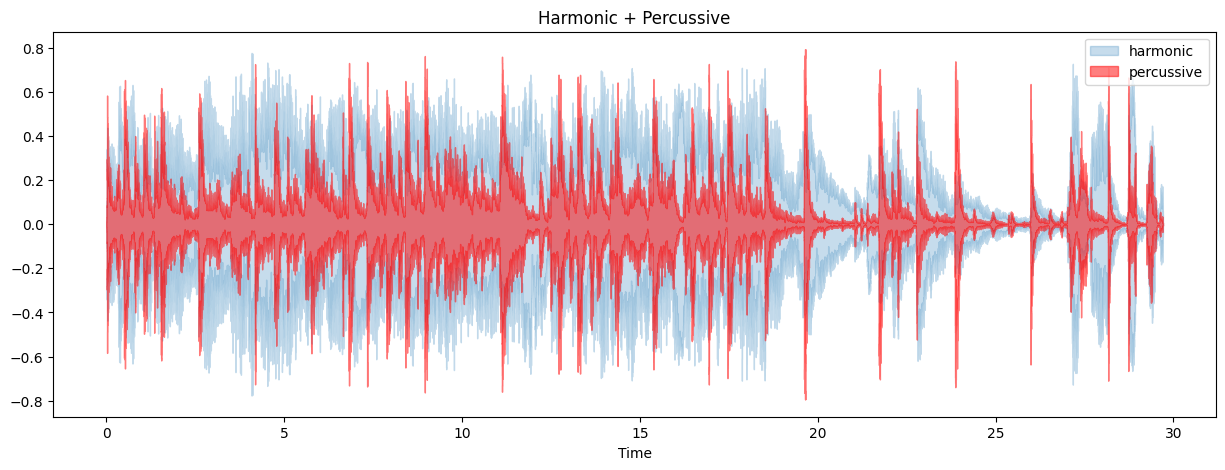

In [ ]:
song, sr = lb.load("/content/gdrive/MyDrive/blues/009e71c32090254211a0b658998a9ca24cdc8664.wav", sr=44100)
y_harmonic, y_percussive = lb.effects.hpss(song)
plt.figure(figsize=(15, 5))
lb.display.waveshow(y_harmonic, sr=sr, alpha=0.25, label='harmonic')
lb.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5, label='percussive')
plt.title('Harmonic + Percussive')
plt.legend()
plt.show()

In [ ]:
COLUMN_NAMES = keys
df_features = pd.DataFrame(columns=COLUMN_NAMES)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/" + "blues_upd"
path_lst = os.listdir(path=path)
print(path_lst)

FileNotFoundError: ignored

In [ ]:
def write_to_csv(genre,df_features):
  path = "/content/gdrive/MyDrive/" + genre
  path_lst = os.listdir(path=path)
  print(path_lst)
  for file in path_lst:
      song, sr = lb.load(path+"/"+file, sr=44100)
      #y: wave form sr: sampling rate (Hz)
      #data[file] = {'y' : y, 'sr': sr}
      file_path = file[:file.index(".wav")]
      print(file_path)
      result_dct = get_features_mean(file_path, song, sr, n_fft = 2048, hop_length = 512)
      #print(result_dct)
      result_df = pd.DataFrame([result_dct])
      #result_df.head()
      df_features = pd.concat([df_features, result_df], ignore_index = True)
  df_features.to_csv(path + "/" + genre + ".csv")

In [ ]:
write_to_csv("blues_upd", df_features)

['c037a64fe93b18301a74545f10f76ee30161c04d.wav', 'c4f9f8966177fb9e5af8197e715a7b753c40b8a4.wav', 'eee64f93ed65be050811033bbedf3b172ac9a2c4.wav', 'cbd92f3c450a0a64a50d6aa8b446483c7d72b2af.wav', '181f35d6aa4af933b1e8bed2718faa844f7ef4e7.wav', '517f33f1da6529d5ff33e7d555c779675afd6023.wav', '817008b35994d1e382e05183004f29732ed9de94.wav', '4c448b6ef8a7c6942248205dfa97735ff5b12249.wav', 'd255847e69af641f2690584df92f990d4fbca6f3.wav', 'c72856423b4955a40eb3f972b3a922baf24216e2.wav', 'c7e9c2b8859fc6eacda3e9346dbc6f3d07130c3f.wav', '791db0ad755c265825d7efc1e309c3152c15c57e.wav', '3bb5eab2e67e76b5a00913cf69c3bd3bcad894fe.wav', '977582bd6dff1a976a3c5337b1c1122986dd2610.wav', 'a4a34b3fb9f572c72fe8394caaced17fbb98d796.wav', 'cc26b3fff957c13ee0f24f258e5b203783971bae.wav', 'defda76ab30e0efcd75b5a49e7eb23f3061c704e.wav', '868448e06b800d3dc8bd6bd7de9c333ae4203d94.wav', '4a9bbf4ed1966c99aebaa080f5180e5b66accbbf.wav', '60c9db4b76c782ebde9a4aeb188f0119d8d909ad.wav', '99bc242b84253241d23afd452e750c3dda7ac5

In [ ]:
write_to_csv("disco_upd", df_features)

['ce505b0ea58a9441419356e3789ee1fca7010c97.wav', '7a2e339cb3dbc9f22fa7e156493ee5b6f50f3096.wav', 'e05f87be014da23b4d749f210797f6185d9f959f.wav', 'cb12dd39f7d19cfe88e966e5fac5aa4590e071c4.wav', '519038c91af391089c44be67ab7af7b5be70f959.wav', 'd1b8031fd2acc06df2ede4d9fd91fd75dc2f5f7c.wav', '1dfd0f5940e78684ee812b46f50226fad6821426.wav', 'be89235c6609de57ea325338f0875d32c2e77b51.wav', '51487a9ffcc6664130d9f34da131d1a8e6e2ec33.wav', '3f8107cea4bd6478566cf675c32756402e582e6d.wav', '9f38063de5fd71193c2697b74c1f1f2f6bd5e4e1.wav', 'cb12d3508931712ed9a572a3c5364852fbcd4d84.wav', 'f3b36b2cbf58d6d561e94da140c1df336ccbd42f.wav', '57d447011ac59dc6729538bf0c2f433af2284fc2.wav', '13a417f6a1206a21ebeedbc97fd94bf23ab63fad.wav', '03e2b60a6a5c101dc0d41866f2e079d8de4a663b.wav', '4b6dd1301d372676cd09f3cda0e9c5375aa4178f.wav', '31e7f6be40bba001381b9170abda55360b811e8c.wav', '09ff67363b0105db455e2b47089c609af5eb77e3.wav', 'ffa4854a4536048636bfb969135bd2ca983ceb20.wav', 'e9a067c7ad958959b0499e1c625e6efc073f74

In [ ]:
write_to_csv("alternative",df_features)

877602f424a9dea277b13301ffc516f9fd1fbe7e
features extracted successfully
c0d9119dc69cae75baf6463e21e43f433fdf5ff4
features extracted successfully
006bc465fe3d1c04dae93a050eca9d402a7322b8
features extracted successfully
b13a1bb2d8a04132982a49b6efee933cc9d67c7e
features extracted successfully
b5ee275ca337899f762b1c1883c11e24a04075b0
features extracted successfully
d01bb6b4b9952d95d2609632474cda8e632e044d
features extracted successfully
a7a72315d777f4ed078d955238f9db158c915fc1
features extracted successfully
5aa4aff376bccc73f7fa7df2954649e30a56c4b1
features extracted successfully
9241188a00b7ae5feb607bf10c21a067c83ed487
features extracted successfully
fb9f4a9b0887326776b4fb7c6d331acd167a7778
features extracted successfully
713b601d02641a850f2a3e6097aacaff52328d57
features extracted successfully
15e1178c9eb7f626ac1112ad8f56eccbec2cd6e5
features extracted successfully
eca519f0a85862d9510d57d59df557081d375e3a
features extracted successfully
cb283ce76eeee06a724b942d36a140cc088dd50f
features e

In [ ]:
write_to_csv("blues",df_features)

722ea18712329ff60ef72655711779208e1895de
features extracted successfully
6e9d44b49b4fdba2f1b7f2fd81c918f7bd832048
features extracted successfully
6cfc4b990168f33e9ebfd96feae0406b8a0625be
features extracted successfully
6d12adc4a57955aea80caa0f6b81b71c6301788e
features extracted successfully
6d80eb0c209e9be95ecbe6b2b880f26209eaee48
features extracted successfully
6e2407911dc31c8e447de65fc5101e939e1919ab
features extracted successfully
6cf350b8a2a648c68916ea24b4115772393a6b3e
features extracted successfully
6cd08d47799bb3986c99a42cb7b9261f1ede5259
features extracted successfully
6a90012a2f47eb44abcaf1641683f86425713e40
features extracted successfully
65a7ccdd5647e8ae8a157e6ecc79752013f1bac5
features extracted successfully
60db8ea0b66439a4f89e134c439faecdbb02ffdc
features extracted successfully
5e4db696dac2fed813287f92d7c3c9bff6ef336a
features extracted successfully
5eb7d9d2a884a81c2136ff21b4030e06d7ad8e19
features extracted successfully
60a60858828b4f564f6555099930fe998b6ee5f6
features e

In [ ]:
write_to_csv("classical",df_features)

2ccc828aea554d645fd16fac252b6229882188c7
features extracted successfully
2a534a8234f62b842035e8cce7b8f6267b72dc21
features extracted successfully
29b4c8860438776cd5b63a34acd2365c323f604a
features extracted successfully
23a3089a9ec451b1001f4b7ef1a72eaed0d6157b
features extracted successfully
21d6fb1e374738f12cd0e90d26ea40aa81ed558a
features extracted successfully
23063b891af42f8aedfe5ed0bad332ee6fb2b94e
features extracted successfully
1f342f2479f0fe6ae2c084540d1b9e5a6ae76348
features extracted successfully
1e9da5e3cb0d364b5eda6815aa9dce69a2739e1e
features extracted successfully
20e33fc6a9b51acc8f0b89d4fb1a133c93b7a7de
features extracted successfully
1dbcc82090698f0eac865ce61c89c52fcc0b6f23
features extracted successfully
1c7e8e4696e8ec0bf4b9dec127817f949c1654cd
features extracted successfully
1b4da6032e2a79457a71501977099912bf0732d7
features extracted successfully
1b23879d2841ca804dcac242f22efc982dcd757e
features extracted successfully
19a1fdb3dc572486a47d7cd01a73b2f065ad2f88
features e

In [ ]:
write_to_csv("disco",df_features)

82945b553ef0d0c5f4fd0e3c285487a9f8110b6a
features extracted successfully
866259f80fdc5ad407ea3fb300aa74bde9635e62
features extracted successfully
848cebd257f3a29eaf89494d31f823520af090b2
features extracted successfully
846292536bfdee759b4f88282364fce76b9e68c3
features extracted successfully
7ef2aac5ff3552b25b623d3ca15c266a5731aa18
features extracted successfully
77cd91bbc7db184389223ea31ed9cd9b21ccd8df
features extracted successfully
782c846c8ab0f6d904a4182f47164ee5cf3934da
features extracted successfully
7d99bed1d9ec6051f7ca9391e4cb79e1b66342b4
features extracted successfully
7764eed1ae614362f9555556d0c47ddbee0e9089
features extracted successfully
74844a5acf98a35f2cc4b91b12f2f559f08fab68
features extracted successfully
70fc255035072ebe515e49d4143c7d07741ddf36
features extracted successfully
704fbc9b86f59da239d2de11d6d5baf808596856
features extracted successfully
73c5ae28d8053c3a0bf278311bca6231bbcfa91f
features extracted successfully
74112d2b7c9e7e355dbbf5e30d075d84cc767213
features e

In [ ]:
write_to_csv("electronic",df_features)

0483f38832f0d59597ad9b5dc032f94e846c3a0c
features extracted successfully
3c1db624efc3610d7a23a15383ad5fc2187fe56b
features extracted successfully
39c860b90d2f3c888c3e0a7a63a7732d7afde0c8
features extracted successfully
3ac48238622a649b184d739c415e9dbb8bfcee93
features extracted successfully
389655e951b60cbc7657c6f38726d2260a358933
features extracted successfully
397d61ddc05a4466f3a18319f0f1fba857b7a1ad
features extracted successfully
3560da257779a178096a18db28a9d311cd5c6019
features extracted successfully
31ecd353381c95e2fbab24d6eed9e1df79b7fd0e
features extracted successfully
32574f4efcfcefb502a75da6364f75678c8adbbb
features extracted successfully
22d6e2fff383a4a73eea9eb5cc6f5afe2140b97d
features extracted successfully
3122721aaf13ed3ec55192c680b717c0a199838d
features extracted successfully
2e16d7ad07d7e285f4ba70ef92c14213dd88e6f5
features extracted successfully
2ef1890ceb6c6025ccea45471c1470d162f8bbad
features extracted successfully
20eada90e2bcb4179aaa531c5fe5f2226694a657
features e

In [ ]:
write_to_csv("folk",df_features)

3c87aec30f17be362b0b9ff99eea8bebd15989e0
features extracted successfully
3b8826b0edea9ead06d71fab8b307bff1e06ba99
features extracted successfully
3c1609516d26c0ec29822a59d6494c06d86528be
features extracted successfully
39df9422333ad45f5b4dea3e61d0684be5e88578
features extracted successfully
393f80ef52bd620e910e4a612c1ba21bfa5fcfbd
features extracted successfully
36e3d380dbe57243e1a428f7f56026a04f0d5beb
features extracted successfully
35d4c5fe405148cbc4a98921267203b7ee02597f
features extracted successfully
37a10b70a803f7e3c233d22a031a4af68ac67f79
features extracted successfully
380d21aa9ea6e8013114a6f4c3bbe2e6f04748f8
features extracted successfully
3530a36721a981528e9388daa3b59a990cf449f5
features extracted successfully
33a0f188803145d2f9849a334a026def117c4cea
features extracted successfully
32d1e4a5a5e6c6e4c8d85ad559906e06fd45a0e4
features extracted successfully
336e350f8a292cdb9dd388af672dd98c42b11e81
features extracted successfully
32d106f4c5bbfccbff47b1d606697d21d884b4a1
features e

In [ ]:
write_to_csv("hiphop",df_features)

09b8e04e35f6fea1f9689bf562ae8abbf910bd28
features extracted successfully
090ce153fce1170abc92fa7f45552ec7117d4bd0
features extracted successfully
0af1c66665c4fdfd11d8252f9135ea8c12d2a1a9
features extracted successfully
080cf575e59c6c309003e83eb88cef789ab0e70c
features extracted successfully
07a427bb1868a7e67c44a6f40ac6cb6782969fee
features extracted successfully
0536e12f7b0600c2f622b8c4b0e0461433b2b2a4
features extracted successfully
01fe27be2a79ed49f60dbb3f09c569361139eca7
features extracted successfully
037fb25bbffb2159c6a3ed81560443addf61e475
features extracted successfully
01f6ee2ac9540d2c3dff7513c6219d8bb04d5002
features extracted successfully
00293d45c0423c1278747e13e4d4e087d5a9b002
features extracted successfully
3f8e4cae74d9af800fb1327f7c869ecf77e5872e
features extracted successfully
3bfd22ebed8273e6ba6494f72db262a58aaf5f04
features extracted successfully
3e49fa793842eddcac44d9b578818de721b74916
features extracted successfully
3cd64fb3b9dcb758609777115120a515a763f816
features e

In [ ]:
write_to_csv("jazz",df_features)

6f32eda36e854efafd0a0c7ed0b0c4f375393942
features extracted successfully
6e55b7029a9deb175aab8f8bda7d8bc3424f584e
features extracted successfully
6d2640fb03879c1969fea5c455e7079f6dfc2e4d
features extracted successfully
68b259e3c3f184cf28a7d044067e3e48542ba436
features extracted successfully
6c0d342bb15cf332c663d708c91b2789c1e87151
features extracted successfully
68ecb7b9e590437520b3aacef44f1f17b2f207b0
features extracted successfully
6c13920a65c03200eb5f3773eb09fe5d024ba8cd
features extracted successfully
65f074563de7fbe7708a9dc77440c138b4935a57
features extracted successfully
60db3b1aba79d3d6ab7b2fb3c6b25ff36b62af70
features extracted successfully
62f8299dbf2082535f6bad44bcb178e861b02680
features extracted successfully
5e0c981226991dc27a4a6991233e2330fd199e7e
features extracted successfully
5c8bac02ab24fbd3e34dc9772b441c123f8e47b7
features extracted successfully
59a923b5a306e7bb7b42de4b466c01741dd156b9
features extracted successfully
570346884aaaf819dcc76b32bbcfd07640194e95
features e

In [ ]:
write_to_csv("pop",df_features)

1c054091c2a9960dead7c651b883d4525ba22ad6
features extracted successfully
1b78ccc193f3245c3051f63c1d4ffd9c5df41486
features extracted successfully
1914feba3e47c85f20858ea8438190be7b405b91
features extracted successfully
1a90ea8a54b976577d552a3dc2c5e4fb0d567961
features extracted successfully
1871a3c86c96e19f954e4690a55e141c36425f6f
features extracted successfully
174e01719c3b06ee1437cb13f892e539df14b6d1
features extracted successfully
15909fde9cbd4ed0b24c188a421055fe1b6baf27
features extracted successfully
16abc105bb743f3b459a96f88ce5925b1bdb3837
features extracted successfully
1454c63a66c27ac745f874d6c113270a9c62d28e
features extracted successfully
1039fd50eaca0a268a2378a6c9244bf85c8b961f
features extracted successfully
0fe82d6c63ec96687dce03dea050fc6f736ca536
features extracted successfully
0cdd183bebefe8747a9f7a80acd49a12142ac6db
features extracted successfully
09740d259ca59790be55c998db9b4220024ec294
features extracted successfully
0952568e496914bb61383588ac417ec70abefc1d
features e

In [ ]:
write_to_csv("rock",df_features)

a828935e429be801aa374eeeb8b2cb0d91755d57
features extracted successfully
eca519f0a85862d9510d57d59df557081d375e3a
features extracted successfully
9cd01344e96f8dfaf0fb47fbb36d9da930daab2f
features extracted successfully
6fedc11d0f55bef176cc1c5725ac1c57f9a2534a
features extracted successfully
aff1fb06d5baed8ceb5827877806423b99347a04
features extracted successfully
3b01294b6b0458fea6ed5a88ea1b1593eb495ead
features extracted successfully
78fd3872e0fa5940b2a36654f07f11e7119be4e2
features extracted successfully
103d8d96e99d937f45e01432cfe8f8c3a990c572
features extracted successfully
713b601d02641a850f2a3e6097aacaff52328d57
features extracted successfully
89f3dc45265602fa874c23d638538af0f2c6b56a
features extracted successfully
b742393cfac34ba605f319a4a8169ed2581bd18b
features extracted successfully
69a9019284eb21c2ea81f099c11ad59cf4d7ac7b
features extracted successfully
1343c561e5b037af86835365ee0bb9718c20ae11
features extracted successfully
67d068feb0fb7e3c89fc786a7bfa0032b77aff53
features e

In [ ]:
df_features.head(10)

,file_path,mfcc_a_0,mfcc_a_1,mfcc_a_2,mfcc_a_3,mfcc_a_4,mfcc_a_5,mfcc_a_6,mfcc_a_7,mfcc_a_8,...,zcr_std,onset_a,onset_std,bpm,rmseP_skew,rmseP_kurtosis,rmseH_skew,rmseH_kurtosis,beats_a,beats_std


# 新段落